# Machine Learning Regression Methods

#### Ewa Dobrowolska, January 2023 

The goal of this project is to perform and compare several machine learning regression algorithms on the **music** dataset (source: [kaggle](https://www.kaggle.com/datasets/yasserh/song-popularity-dataset). The dataset consists of data regarding Spotify songs and their popularity. Variables:

| Variable | Description | 
| :- | :- |
| song_name | name of the song |
| song_popularity | song popularity |
| song_duration_ms | Song suration in ms |
| acousticness | acousticness |
| danceability | danceability |
| energy | energy |
| instrumentalness | instrumentalness |
| key | key |
| liveness | liveness |
| loudness | loudness |
| audio_mode | audio_mode |
| speechiness | speechiness |
| tempo | tempo |
| time_signature | time_signature |
| audio_valence | audio_valence |


The dependent variable is `song_popularity`.

### Data description & Specificity 

Let's load nessecary packages and the data:

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, tree
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
import warnings 
warnings.filterwarnings('ignore')

#os.chdir("C:/Users/ewado/OneDrive/Dokumenty/Studia/ML/projekt")

In [2]:
data = pd.read_csv("song_data.csv")
data.shape # 18835 observations of 15 variables

(18835, 15)

Let's take a look at the data's basic descriptions:

In [3]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
data.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [5]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


Let's check if there is any missing data:

In [6]:
data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

As we can see, some of the songs repeat - the data consists of a few pooled rankings:

In [7]:
data['song_name'].value_counts()

Better                                            21
FEFE (feat. Nicki Minaj & Murda Beatz)            19
MIA (feat. Drake)                                 18
Taki Taki (with Selena Gomez, Ozuna & Cardi B)    18
No Stylist                                        17
                                                  ..
Bassride                                           1
The Beat                                           1
We Are the Brave - Fatum Remix                     1
Long Live House Music                              1
Up to Me                                           1
Name: song_name, Length: 13070, dtype: int64

Modelling the data in such form makes very little sense - it's reasonable to expect that each song appears in the ranking just once. That is, when making predictions we could ask: 
 - **Which position would a certain song take in this particular ranking?** - As for now we cannot, as the data consists of a few pooled rankings, and we don't know which song appeared in which ranking;
 - **How good is the song at average?** - Calculate the average position makes no sense since we see only the first 100 positions, so that if some songs were wery popular at some time and then dropped to a very low position (they appear in the dataset just once, with very high score) their average score would be higher than for songs that managed to maintain their high position in the ranking for a long time (eg. were the 1st and then kept position 99);
 - **What is the song's potential - what is the highest position in the ranking that this song is able to achieve?** - That is the approach used in this project, as it appears to be the most reasonable one.  
 
 Hence, the duplicates are removed.

In [8]:
data = data.sort_values(by=['song_name', "song_popularity"])
data = data.drop_duplicates(subset = 'song_name', keep = 'first')
data.shape

(13070, 15)

In [9]:
data['song_name'].value_counts()

"40" - Live Version 1983             1
Pretty Fly (For A White Guy)         1
Prendi (feat. Lirico En La Casa)     1
Pressure                             1
Pressure - Amended                   1
                                    ..
Good Nights (feat. Mascolo)          1
Good Riddance (Time of Your Life)    1
Good Rockin' Daddy                   1
Good Thing                           1
피 땀 눈물                               1
Name: song_name, Length: 13070, dtype: int64

Now it looks good.  
Next, the types of variables are changed, and the variable `song_name` is removed, as it has no predicting power:

In [10]:
data["key"] = data["key"].astype('category')
data["time_signature"] = data["time_signature"].astype('category')
data["audio_mode"] = data["audio_mode"].astype('category')

data.dtypes # now it looks ok

song_name             object
song_popularity        int64
song_duration_ms       int64
acousticness         float64
danceability         float64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
audio_mode          category
speechiness          float64
tempo                float64
time_signature      category
audio_valence        float64
dtype: object

In [11]:
data = data.drop('song_name', axis=1)

In [12]:
data.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
16726,1,225440,0.109000,0.257,0.472,0.000945,8,0.8290,-16.259,1,0.0399,143.517,4,0.286
14132,48,202493,0.000696,0.315,0.970,0.000000,8,0.2770,-4.709,1,0.1020,178.068,4,0.423
14990,67,199413,0.005980,0.552,0.804,0.000000,8,0.1110,-4.299,1,0.0303,95.980,4,0.714
2198,58,213813,0.016000,0.502,0.681,0.107000,7,0.1020,-8.263,1,0.0276,112.160,4,0.584
12160,10,208484,0.612000,0.697,0.907,0.282000,3,0.0624,-5.130,1,0.0920,98.953,4,0.542


### Explanatory data analysis & visualisation

Let's start with taking a look at the distribution of the dependent variable:

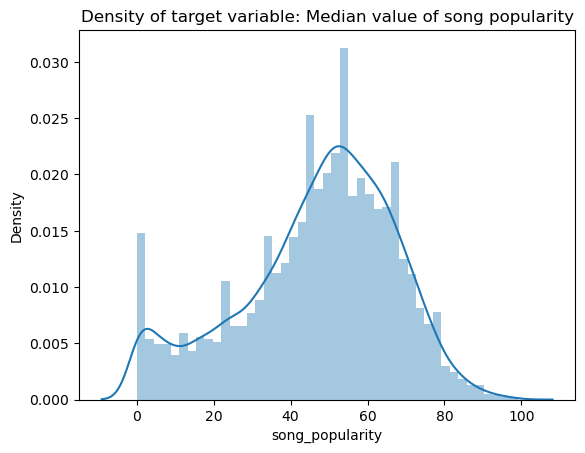

In [13]:
sns.distplot(a=data['song_popularity']).set(title='Density of target variable: Median value of song popularity')
plt.show()

Let's take a look at categorical variables:

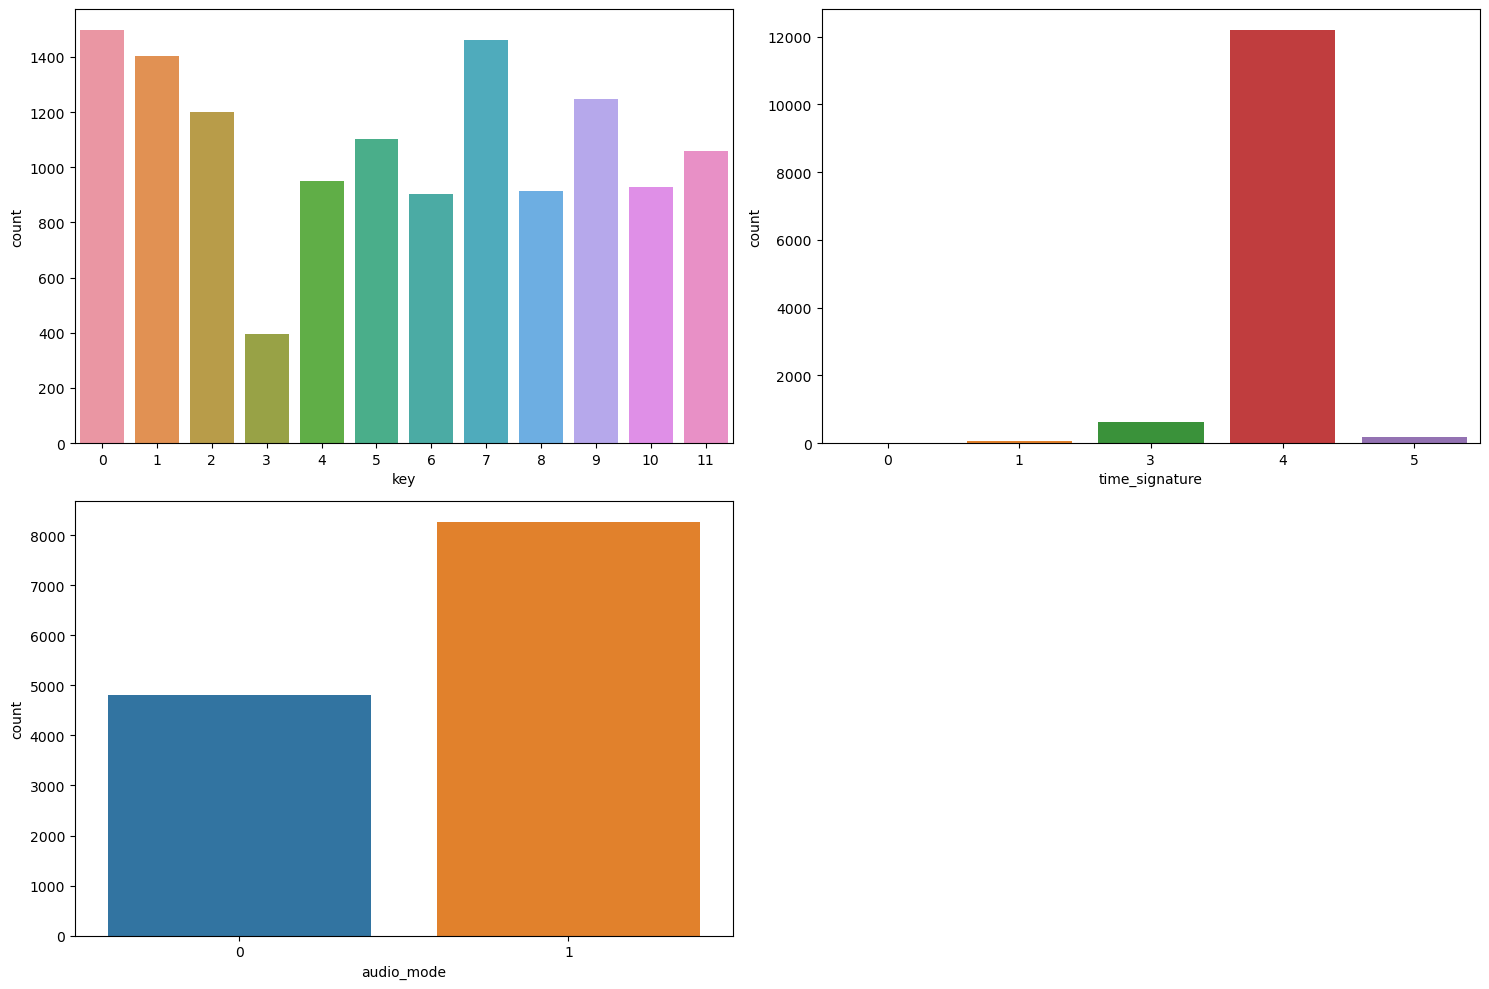

In [14]:
cat_f = ["key", "time_signature", "audio_mode"]
num_f = ["song_duration_ms", "acousticness", "danceability","energy","instrumentalness", "liveness", "loudness", "speechiness",
        "tempo"]


plt.figure(figsize=[15,10])

for i in range(len(cat_f)):
    plt.subplot(2,2,i+1)
    sns.countplot(data[cat_f[i]])
        
plt.tight_layout()
plt.show()

Now, let's see the distribution of the numeric features:

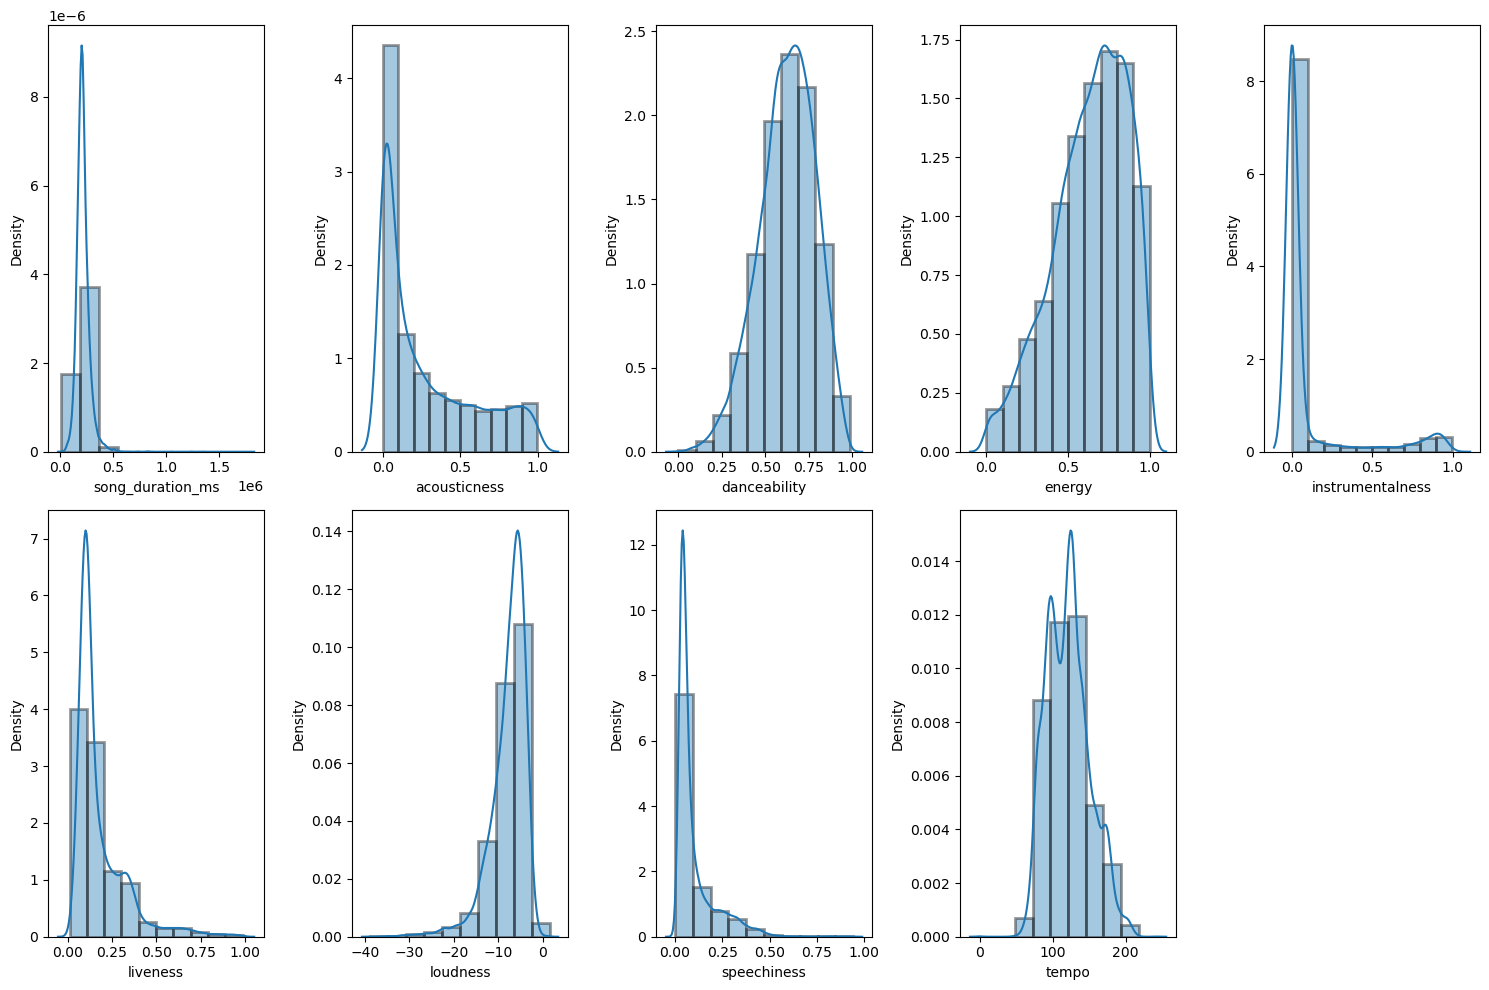

In [15]:
plt.figure(figsize=[15,10])
for i in range(len(num_f)):
    plt.subplot(2,5,i+1)
    sns.distplot(data[num_f[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10)

plt.tight_layout()
plt.show()


<AxesSubplot:>

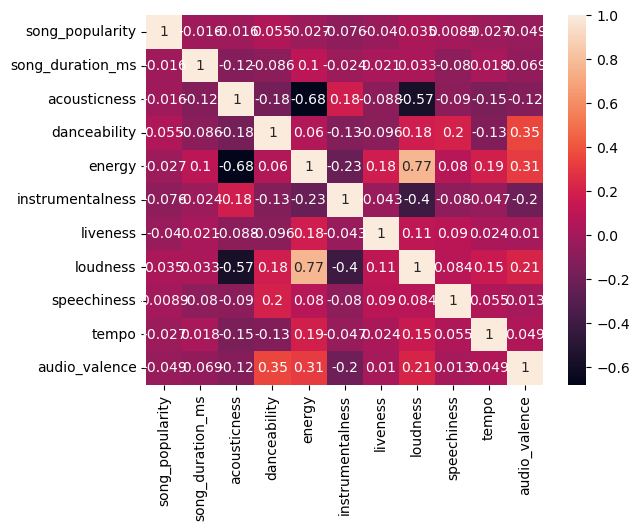

In [16]:
sns.heatmap(data.corr(), annot= True)

As we can see, there is some multicolinearity. The VIF statistic will be checked to see how strong it is. Right now we define the fuction used to check VIF:

In [17]:
def vif(data, features):
    data_vif = data[features]
    data_vif['Constant'] = 1
    vif = pd.DataFrame({"VIF": [variance_inflation_factor(data_vif.values, variable) for variable in range(data_vif.shape[1])]})
    vif.set_index(data_vif.columns, inplace=True)
    vif = vif.drop('Constant', axis=0)
    return vif

### Data preparation, Variable selection

Firstly, we replace the variable `time_signature` with the variable `time_4` (which is a dummy for `time_signature` = 4), as there is not enough data regarding other time signatures and they have very little predicting power. 

In [18]:
data["time_4"] = data["time_signature"].map({0: 0, 1:0, 2:0, 3:0, 4:1, 5:0})
data = data.drop("time_signature", axis=1)

We One Hot encode the rest of the categorical variables: 

In [19]:
data = pd.get_dummies(data)
data = data.drop(['key_0', "audio_mode_0"], axis=1) #leave one level out as a base level (to avoid multicolinearity)

Split the data into the train and test sets:

In [20]:
X=data.drop("song_popularity", axis = 1) 
y=data["song_popularity"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
vif(X_train, X_train.columns).sort_values('VIF', ascending=False)

,VIF
energy,4.004087
loudness,3.172422
acousticness,2.086875
key_1,1.746435
key_7,1.744034
key_9,1.665636
key_2,1.626171
key_11,1.619829
key_5,1.596412
key_4,1.547133


As we can see, the VIF statistic is low for all variables (lower than 5) so the multicolinearity is low - we can leave the data as it is. The function used to evaluate the models is defined:

In [22]:
def evaluate_model(y_pred_train, y_train, y_test_pred, y_test, model_cv):
    r2_train = round(r2_score(y_train, y_pred_train),3)
    r2_test = round(r2_score(y_test, y_pred_test),3)
    r2_cv = model_cv['test_r2'].mean()
    mse_train = round(mean_squared_error(y_train, y_pred_train),3)
    mse_test = round(mean_squared_error(y_test, y_pred_test),3)
    mse_cv = -model_cv['test_neg_mean_squared_error'].mean()'
    mae_train = round(mean_absolute_error(y_train, y_pred_train),3)
    mae_test = round(mean_absolute_error(y_test, y_pred_test),3)
    mae_cv = -model_cv['test_neg_mean_absolute_error'].mean()
    
    eval_df = pd.DataFrame({"Metric": ["R2", "MSE", "MAE"], 
                        "Train": [r2_train, mse_train, mae_train],
                        "Test": [r2_test, mse_test, mae_test],
                        "CV": [r2_cv, mse_cv, mae_cv]})
    print(eval_df)
    
    return [r2_train, r2_test, r2_cv, mse_train, mse_test, mse_cv, mae_train, mae_test, mae_cv]

Save the vector of metrics to be used later in cross-validation:

In [23]:
eval_metrics = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

Now we can proceed with the models.

### 1. Linear Regression

The first model is a Linear Regression:

In [24]:
model = LinearRegression()
model_cv = cross_validate(model, X_train, y_train, cv=10, scoring=eval_metrics)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

lr_eval = evaluate_model(y_pred_train, y_train, y_pred_test, y_test, model_cv)

  Metric    Train     Test          CV
0     R2    0.021    0.017    0.015189
1    MSE  397.323  408.982  399.372409
2    MAE   15.894   16.138   15.936067


### 2. Lasso Regression

The second model was the Lasso Regression:

In [25]:
model = Lasso(alpha=1)
model_cv = cross_validate(model, X_train, y_train, cv=10, scoring=eval_metrics)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

lasso_eval = evaluate_model(y_pred_train, y_train, y_pred_test, y_test, model_cv)

  Metric    Train     Test          CV
0     R2    0.002    0.004    0.000031
1    MSE  405.251  414.652  405.620372
2    MAE   16.055   16.274   16.062356


### 3. Ridge Regression

The next model was the Ridge Regression:

In [26]:
model = Ridge(alpha=1)
model_cv = cross_validate(model, X_train, y_train, cv=10, scoring=eval_metrics)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

ridge_eval = evaluate_model(y_pred_train, y_train, y_pred_test, y_test, model_cv)

  Metric    Train     Test          CV
0     R2    0.021    0.018    0.015206
1    MSE  397.323  408.980  399.365982
2    MAE   15.894   16.138   15.935968


### 4. Decicion Tree Regression

The next model was Decision Tree Regression. Grid Search was used to tune hyperparameters:

In [27]:
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

parameters={"splitter":["best","random"],
            "criterion": ["squared_error", "friedman_mse", "absolute_error"],
            "max_features":["auto","sqrt",None],
            "max_depth" : [3,5,7,9],
            "min_samples_leaf":[3,5,7,9],
            "max_leaf_nodes":[None,10,30] }

grid = GridSearchCV(model, 
                    param_grid = parameters, 
                    cv = 10, 
                    verbose=1, 
                    n_jobs =-1) 

grid.fit(X_train, y_train)
grid_search_tree = grid.best_estimator_

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


The best estimator has the following hyperparameters:

In [28]:
grid_search_tree

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=30, min_samples_leaf=3,
                      splitter='random')

Let's evaluate it:

In [29]:
y_pred_test = grid_search_tree.predict(X_test)
y_pred_train = grid_search_tree.predict(X_train)

# Cross-validate again to get all the needed metrics 
model_cv = cross_validate(grid_search_tree, X_train, y_train, cv=10, scoring=eval_metrics)
tree_eval = evaluate_model(y_pred_train, y_train, y_pred_test, y_test, model_cv)

  Metric    Train     Test          CV
0     R2    0.044    0.015    0.015633
1    MSE  387.920  410.228  399.302659
2    MAE   15.639   16.121   15.897869


### 5. Random Forest

The next algorithm was Random Forest. The Grid Search was used to tune hyperparameters:

In [61]:
model = RandomForestRegressor(n_estimators = 500)
model.fit(X_train, y_train)

parameters={"max_depth" : [5,6,7,8,9,10],
            "min_samples_leaf":[3,5,7,9],
            "max_leaf_nodes":[None,10,30]}

grid = GridSearchCV(model, 
                    param_grid = parameters,
                    cv = 5,
                    verbose=1, 
                    n_jobs =-1) 

grid.fit(X_train, y_train)
grid_search_rf = grid.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


The best estimator has the following hyperparameters:

In [62]:
grid_search_rf

RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=500)

Let's evaluate it:

In [63]:
y_pred_test = grid_search_rf.predict(X_test)
y_pred_train = grid_search_rf.predict(X_train)

# Cross-validate again to get all the needed metrics 
model_cv = cross_validate(grid_search_rf, X_train, y_train, cv=5, scoring=eval_metrics)
rf_eval = evaluate_model(y_pred_train, y_train, y_pred_test, y_test, model_cv)

  Metric    Train     Test          CV
0     R2    0.195    0.052    0.052963
1    MSE  326.862  394.453  384.462604
2    MAE   14.332   15.851   15.561674


### 6. Support Vector Regression (SVR)

The next model was the SVR:

In [34]:
model =  SVR(kernel = 'rbf')
model_cv = cross_validate(model, X_train, y_train, cv=10, scoring=eval_metrics)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

svr_eval = evaluate_model(y_pred_train, y_train, y_pred_test, y_test, model_cv)

  Metric    Train     Test          CV
0     R2   -0.021   -0.019   -0.022485
1    MSE  414.636  424.120  414.901647
2    MAE   15.806   16.011   15.813821


### 7. K-Nearest Neighbours (KNN)

The next model was the K-NN model. Grid Search was used to find the optimal number of neighbours:

In [35]:
model =  KNeighborsRegressor()
model.fit(X_train, y_train)

parameters={"n_neighbors" : range(2, 50, 2)}

grid = GridSearchCV(model, 
                    param_grid = parameters,
                    cv = 10,
                    verbose=1, 
                    n_jobs =-1) 

grid.fit(X_train, y_train)
grid_search_knn = grid.best_estimator_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


The best estimatior used 48 neighbours:

In [36]:
grid_search_knn

KNeighborsRegressor(n_neighbors=48)

Let's evaluate the model:

In [37]:
y_pred_test = grid_search_knn.predict(X_test)
y_pred_train = grid_search_knn.predict(X_train)

# Cross-validate again to get all the needed metrics 
model_cv = cross_validate(grid_search_knn, X_train, y_train, cv=10, scoring=eval_metrics)
knn_eval = evaluate_model(y_pred_train, y_train, y_pred_test, y_test, model_cv)

  Metric    Train     Test          CV
0     R2    0.022   -0.012   -0.019206
1    MSE  396.851  421.196  413.415453
2    MAE   15.879   16.373   16.201083


### 8. Neural Network

For neural network, the function was defined:

In [55]:
def create_ann():
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1:])))
    model.add(Dense(units=1))
    model.compile(loss='mse', metrics=['mae'])
    return model

The variables were scaled:

In [56]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

And Grid Search was used to tune `batch_size` and `epochs`:

In [57]:
model = KerasRegressor(model=create_ann, verbose=0)

parameters = {'batch_size':[10,30,50],
            'epochs': [20,40,80,100,120,140]}


grid = GridSearchCV(estimator=model, 
                    param_grid=parameters,
                    scoring='neg_mean_absolute_error',
                    cv=5,
                    n_jobs=-1)

grid.fit(X_train, y_train, verbose = 0)
grid_search_nn = grid.best_estimator_

The best estimator used the following values of parameters:

In [58]:
grid_search_nn

KerasRegressor(
	model=<function create_ann at 0x00000187AE717DC0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=50
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=120
)

Let's evaluate the model:

In [59]:
y_pred_train = grid_search_nn.predict(X_train)
y_pred_test = grid_search_nn.predict(X_test)

# Cross-validate again to get all the needed metrics 
model_cv = cross_validate(grid_search_nn, X_train, y_train, cv=5, scoring=eval_metrics)
nn_eval = evaluate_model(y_pred_train, y_train, y_pred_test, y_test, model_cv)

  Metric    Train     Test          CV
0     R2    0.096    0.018    0.022573
1    MSE  366.876  408.870  396.679882
2    MAE   15.203   16.104   15.765602


### Comparison of results

In [64]:
comparison_df = pd.DataFrame()
comparison_df["Linear Regression"] = lr_eval
comparison_df["Lasso Regression"] = lasso_eval
comparison_df["Ridge Regression"] = ridge_eval
comparison_df["Decision Tree"] = tree_eval
comparison_df["Random Forest"] = rf_eval
comparison_df["Support Vector Regression"] = svr_eval
comparison_df["K-Nearest-Neighbours"] = knn_eval
comparison_df["Neural Network"] = nn_eval

comparison_df = comparison_df.transpose()
comparison_df = comparison_df.rename(columns = {0: "R2 train", 1: "R2 test", 2: "R2 CV", 3: "MSE train", 4: "MSE test", 
                                                5: "MSE CV", 6: "MAE train", 7: "MAE test", 8: "MAE CV"})
comparison_df

,R2 train,R2 test,R2 CV,MSE train,MSE test,MSE CV,MAE train,MAE test,MAE CV
Linear Regression,0.021,0.017,0.015189,397.323,408.982,399.372409,15.894,16.138,15.936067
Lasso Regression,0.002,0.004,0.000031,405.251,414.652,405.620372,16.055,16.274,16.062356
Ridge Regression,0.021,0.018,0.015206,397.323,408.980,399.365982,15.894,16.138,15.935968
Decision Tree,0.044,0.015,0.015633,387.920,410.228,399.302659,15.639,16.121,15.897869
Random Forest,0.195,0.052,0.052963,326.862,394.453,384.462604,14.332,15.851,15.561674
Support Vector Regression,-0.021,-0.019,-0.022485,414.636,424.120,414.901647,15.806,16.011,15.813821
K-Nearest-Neighbours,0.022,-0.012,-0.019206,396.851,421.196,413.415453,15.879,16.373,16.201083
Neural Network,0.096,0.018,0.022573,366.876,408.870,396.679882,15.203,16.104,15.765602


The best results were obtained using the **Random Forest** algorithm - on all datasets (training, testing, cross-validated) the value R2 metric is the highest of all algorithms, while MSE and MAE are the lowest. However, the difference between evaluation metrics on train and test sets (or train and cross-validated) is also much bigeer than for the rest of the models; therefore, a **Neural Network** would be also worth consideration (as a second-best and more stable).  